In [4]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)
X.shape

(100, 1)

In [12]:
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [5]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [13]:
#  #对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [20]:
# 多项式拟合， 设定最高次项
d= 5

# 进行高次项的转换
ploy = PF(degree=d)
X_ = ploy.fit_transform(X)  # 训练数据的转换
line_ = PF(degree=d).fit_transform(line)  # 测试数据的转换
line_.shape

(1000, 6)

In [21]:
X_.shape

(100, 6)

In [37]:
ploy.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']

In [22]:
X.shape

(100, 1)

In [23]:
#  进行数据的拟合
Linear_R = LinearRegression().fit(X_,y)
Linear_R.score(X_,y)

0.8561679370344799

In [24]:
# 测试数据的拟合
Linear_R.score(line_, np.sin(line))

0.9868904451787983

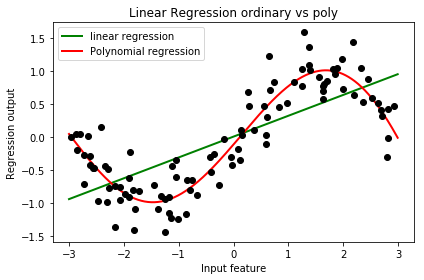

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)
line_ = PF(degree=d).fit_transform(line)
# 放置画布
fig,ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color="green"
        ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color="red"
        ,label="Polynomial regression")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
                                                    
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

我们可以使用接口get_feature_names来调用生成的新特征矩阵的各个特
征上的名称，以便帮助我们解释模型

In [38]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [40]:
X = np.arange(9).reshape(3,3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
ploy = PolynomialFeatures(degree=5).fit(X)
ploy

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [45]:
# 重要接口 gte_feature_names
ploy.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [46]:
len(ploy.get_feature_names())

56

In [47]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [48]:
x = pd.DataFrame(housevalue.data)
y = housevalue.target

In [49]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [50]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [53]:
poly = PolynomialFeatures(degree=2).fit(x,y)
poly.get_feature_names(x.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [55]:
x_ = poly.transform(x)
#  在这之后
x_.shape

(20640, 45)

In [56]:
# 在这之后，我们依然可以直接建立模型，然后使用下行回归的 coef_属性 来查看什么特征对标签的影响最大
reg = LinearRegression().fit(x_,y)

In [58]:
coef = reg.coef_
coef

array([ 5.91954814e-08, -1.12430256e+01, -8.48898555e-01,  6.44105940e+00,
       -3.15913308e+01,  4.06090678e-04,  1.00386233e+00,  8.70568192e+00,
        5.88063275e+00, -3.13081210e-02,  1.85994754e-03,  4.33020364e-02,
       -1.86142288e-01,  5.72831401e-05, -2.59019451e-03, -1.52505719e-01,
       -1.44242945e-01,  2.11725362e-04, -1.26218981e-03,  1.06115037e-02,
        2.81885312e-06, -1.81716946e-03, -1.00690374e-02, -9.99950183e-03,
        7.26947768e-03, -6.89064378e-02, -6.82365591e-05,  2.68878839e-02,
        8.75089954e-02,  8.22890400e-02,  1.60180957e-01,  5.14264000e-04,
       -8.71911374e-02, -4.37043037e-01, -4.04150612e-01,  2.73779156e-09,
        1.91426752e-05,  2.29529831e-05,  1.46567757e-05,  8.71561034e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867357e-02,  1.08107173e-01,
        3.99077351e-02])

In [61]:
zip(ploy.get_feature_names(x.columns),reg.coef_)

In [62]:
[zip(ploy.get_feature_names(x.columns),reg.coef_)]

In [63]:
[*zip(ploy.get_feature_names(x.columns),reg.coef_)]

[('1', 5.919548140983325e-08),
 ('住户收入中位数', -11.243025601117052),
 ('房屋使用年代中位数', -0.8488985550865555),
 ('平均房间数目', 6.4410594008838045),
 ('住户收入中位数^2', -31.591330845036552),
 ('住户收入中位数 房屋使用年代中位数', 0.000406090678218692),
 ('住户收入中位数 平均房间数目', 1.003862325169533),
 ('房屋使用年代中位数^2', 8.705681915719548),
 ('房屋使用年代中位数 平均房间数目', 5.88063274731183),
 ('平均房间数目^2', -0.0313081210095138),
 ('住户收入中位数^3', 0.0018599475393608605),
 ('住户收入中位数^2 房屋使用年代中位数', 0.043302036387842704),
 ('住户收入中位数^2 平均房间数目', -0.1861422884820042),
 ('住户收入中位数 房屋使用年代中位数^2', 5.728314010956206e-05),
 ('住户收入中位数 房屋使用年代中位数 平均房间数目', -0.00259019450741919),
 ('住户收入中位数 平均房间数目^2', -0.1525057186944929),
 ('房屋使用年代中位数^3', -0.14424294470380783),
 ('房屋使用年代中位数^2 平均房间数目', 0.00021172536249754108),
 ('房屋使用年代中位数 平均房间数目^2', -0.0012621898121649244),
 ('平均房间数目^3', 0.010611503740612926),
 ('住户收入中位数^4', 2.8188531228417142e-06),
 ('住户收入中位数^3 房屋使用年代中位数', -0.001817169463555776),
 ('住户收入中位数^3 平均房间数目', -0.010069037408713212),
 ('住户收入中位数^2 房屋使用年代中位数^2', -0.0099995018

In [66]:
#  放入到  DataFrame中去进行排序
coeff = pd.DataFrame([poly.get_feature_names(x.columns),reg.coef_.tolist()]).T
coeff.head()


,0,1
0,1,5.91955e-08
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
3,平均房间数目,6.44106
4,平均卧室数目,-31.5913


In [69]:
coeff.columns = ["features","coef"]
coeff.sort_values(by="coef")

,features,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


In [71]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(x,y)
x_ = poly.transform(x)
reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.6062326851998051

In [73]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(x_,y)
print("R2:{}".format(reg_.score(x_,y)))
print("time:{}".format(time()-time0))


R2:0.7450320290116124
time:0.5006594657897949


In [74]:
#  假如使用其他 模型呢
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(x,y).score(x,y)))
print("time:{}".format(time()-time0))

R2:0.9739731568319011
time:10.267538785934448
